# データ読込とデータ結合

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#    データ読込

In [2]:
# CSVファイルを読み込む
train = pd.read_csv('./train.csv', encoding = 'utf-8')
test = pd.read_csv('./test.csv', encoding = 'utf-8')
condition = pd.read_csv('./condition.csv', encoding = 'utf-8')
stadium = pd.read_csv('./stadium.csv', encoding = 'utf-8')
sample = pd.read_csv('./sample_submit.csv', encoding = 'utf-8')

In [3]:
# trainデータ確認
# trainから5件取得
train.head(5)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [4]:
# testデータ確認
# testから5件取得
test.head(5)

,id,year,stage,match,gameday,time,home,away,stadium,tv
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス


In [5]:
# conditionデータ確認
# conditionから5件取得
condition.head(5)

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [6]:
# stadiumデータ確認
# stadiumから5件取得
stadium.head(5)

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


In [7]:
# sampleデータ確認
# sampleから5件取得
sample.head(5)

,15822,10662.3951191
0,15823,10662.395119
1,15824,10662.395119
2,15825,10662.395119
3,15827,10662.395119
4,15828,10662.395119


# 基礎集計(trainのみ)

In [8]:
# 欠損値の個数をカウント
train.isna().sum().sum()

0

In [9]:
# trainの質的変数の個数を取得
train['stage'].value_counts().reindex(['Ｊ１', 'Ｊ２'])

Ｊ１     675
Ｊ２    1046
Name: stage, dtype: int64

In [10]:
train['match'].value_counts()

第６節第１日     54
第９節第１日     53
第１２節第１日    52
第３節第１日     51
第４節第１日     51
第１１節第１日    50
第１５節第１日    49
第８節第１日     49
第２節第１日     48
第１０節第１日    48
第１節第１日     46
第２３節第１日    45
第２１節第１日    44
第２２節第１日    44
第２０節第１日    44
第１７節第１日    43
第１３節第１日    43
第２４節第１日    43
第７節第１日     43
第１６節第１日    42
第１４節第１日    40
第３２節第１日    38
第２９節第１日    37
第５節第１日     37
第３１節第１日    37
第１９節第１日    37
第２８節第１日    36
第１８節第１日    36
第３３節第１日    36
第２６節第１日    35
           ..
第３７節第１日    12
第１８節第２日    11
第１６節第２日    11
第１４節第２日    10
第１３節第２日    10
第３７節第２日     8
第１７節第２日     8
第１９節第２日     8
第８節第２日      8
第３０節第２日     8
第２５節第２日     8
第７節第２日      8
第９節第２日      4
第１節第２日      4
第１２節第２日     3
第６節第２日      2
第３節第２日      2
第３３節第２日     2
第１５節第２日     2
第２８節第２日     2
第３４節第２日     2
第１０節第２日     1
第３５節第２日     1
第２６節第２日     1
第３６節第３日     1
第３１節第２日     1
第１１節第２日     1
第１７節第３日     1
第３６節第２日     1
第３６節第４日     1
Name: match, Length: 72, dtype: int64

In [11]:
train['gameday'].value_counts()

11/10(日)      19
05/03(土・祝)    19
04/26(土)      19
05/03(木・祝)    18
10/27(日)      17
05/06(火・休)    17
05/03(金・祝)    17
03/17(土)      16
05/06(日)      16
05/06(月・休)    15
04/29(火・祝)    14
05/20(日)      12
04/14(日)      12
04/22(日)      12
04/20(日)      12
06/07(土)      11
08/05(日)      11
03/22(土)      11
09/02(日)      11
03/25(日)      11
06/29(土)      11
06/13(水)      11
03/03(日)      11
04/27(金)      11
07/07(日)      11
09/17(月・祝)    11
03/17(日)      11
04/05(土)      11
03/16(日)      11
04/15(日)      11
              ..
03/01(土)       5
08/11(土)       5
06/27(水)       2
05/29(水)       2
05/25(日)       2
09/23(月・祝)     2
07/15(火)       2
05/25(金)       2
09/16(月・祝)     2
10/23(水)       1
03/28(金)       1
05/15(水)       1
05/12(月)       1
06/09(日)       1
10/01(月)       1
08/12(月)       1
06/01(日)       1
04/29(月・祝)     1
06/03(月)       1
10/25(木)       1
05/17(木)       1
06/01(金)       1
06/02(日)       1
10/18(木)       1
04/11(金)       1
06/14(金)       1
04/26(金)       1
10/26(土)      

In [12]:
train['time'].value_counts()

19:04    254
19:03    166
13:04    148
13:03    121
16:04    118
16:03    113
14:04    102
18:03     99
18:04     87
14:03     69
15:04     59
18:34     42
15:03     41
19:05     35
17:04     26
13:05     24
17:03     23
15:34     21
19:34     18
16:05     17
14:05     15
18:05     15
15:05     11
18:33      9
18:35      7
17:05      7
13:06      6
12:34      5
14:06      5
16:06      4
        ... 
12:33      3
17:33      3
19:06      3
17:34      3
12:35      2
19:35      2
13:33      2
15:35      2
14:35      1
19:49      1
19:30      1
19:00      1
17:35      1
14:02      1
19:02      1
15:01      1
14:36      1
14:00      1
19:01      1
17:06      1
16:07      1
16:02      1
18:06      1
20:04      1
20:00      1
13:02      1
13:08      1
19:15      1
18:30      1
14:34      1
Name: time, Length: 63, dtype: int64

In [13]:
train['home'].value_counts()

愛媛ＦＣ           51
ロアッソ熊本         51
栃木ＳＣ           50
松本山雅ＦＣ         49
モンテディオ山形       49
徳島ヴォルティス       48
ＦＣ岐阜           48
アビスパ福岡         48
ファジアーノ岡山       47
ジェフユナイテッド千葉    47
水戸ホーリーホック      47
コンサドーレ札幌       46
京都サンガF.C.      46
湘南ベルマーレ        46
横浜ＦＣ           45
カターレ富山         45
東京ヴェルディ        44
大分トリニータ        43
ギラヴァンツ北九州      43
ジュビロ磐田         43
ヴァンフォーレ甲府      42
ヴィッセル神戸        41
柏レイソル          41
浦和レッズ          40
ガンバ大阪          40
川崎フロンターレ       39
ベガルタ仙台         39
セレッソ大阪         39
清水エスパルス        39
ＦＣ東京           38
アルビレックス新潟      37
サンフレッチェ広島      37
サガン鳥栖          36
大宮アルディージャ      36
鹿島アントラーズ       36
横浜Ｆ・マリノス       36
ガイナーレ鳥取        35
名古屋グランパス       35
ザスパクサツ群馬       28
Ｖ・ファーレン長崎      27
ＦＣ町田ゼルビア       18
ザスパ草津          17
カマタマーレ讃岐        9
Name: home, dtype: int64

In [14]:
train['away'].value_counts()

ロアッソ熊本         53
水戸ホーリーホック      50
ギラヴァンツ北九州      50
湘南ベルマーレ        49
松本山雅ＦＣ         49
カターレ富山         49
京都サンガF.C.      48
栃木ＳＣ           47
東京ヴェルディ        47
ＦＣ岐阜           46
愛媛ＦＣ           46
アビスパ福岡         46
ファジアーノ岡山       46
モンテディオ山形       45
ジェフユナイテッド千葉    45
ガンバ大阪          45
大分トリニータ        44
ヴィッセル神戸        44
横浜ＦＣ           43
徳島ヴォルティス       42
ヴァンフォーレ甲府      41
サンフレッチェ広島      40
アルビレックス新潟      39
ジュビロ磐田         39
セレッソ大阪         39
コンサドーレ札幌       38
ＦＣ東京           38
大宮アルディージャ      38
柏レイソル          38
ベガルタ仙台         38
横浜Ｆ・マリノス       38
浦和レッズ          38
サガン鳥栖          37
川崎フロンターレ       37
鹿島アントラーズ       36
清水エスパルス        34
ガイナーレ鳥取        34
名古屋グランパス       33
ザスパクサツ群馬       31
Ｖ・ファーレン長崎      30
ＦＣ町田ゼルビア       20
ザスパ草津          19
カマタマーレ讃岐       12
Name: away, dtype: int64

In [15]:
train['stadium'].value_counts()

味の素スタジアム                     64
ニンジニアスタジアム                   51
栃木県グリーンスタジアム                 50
松本平広域公園総合球技場                 49
ＮＤソフトスタジアム山形                 49
ニッパツ三ツ沢球技場                   49
レベルファイブスタジアム                 48
鳴門・大塚スポーツパーク　ポカリスエットスタジアム    48
ケーズデンキスタジアム水戸                47
フクダ電子アリーナ                    47
シティライトスタジアム                  46
Ｓｈｏｎａｎ　ＢＭＷスタジアム平塚            46
富山県総合運動公園陸上競技場               45
うまかな・よかなスタジアム                45
正田醤油スタジアム群馬                  45
岐阜メモリアルセンター長良川競技場            45
京都市西京極総合運動公園陸上競技場兼球技場        44
北九州市立本城陸上競技場                 43
大分銀行ドーム                      43
ヤマハスタジアム（磐田）                 40
埼玉スタジアム２００２                  40
万博記念競技場                      40
山梨中銀スタジアム                    39
等々力陸上競技場                     39
ノエビアスタジアム神戸                  39
ユアテックスタジアム仙台                 38
日立柏サッカー場                     37
デンカビッグスワンスタジアム               37
ＩＡＩスタジアム日本平                  37
エディオンスタジアム広島                 37
県立カシマサッカースタジアム               36
とりぎんバードス

In [16]:
train['tv'].value_counts()

スカパー！／スカパー！プレミアムサービス                         806
スカパー／ｅ２／スカパー光                                339
スカパー！／スカパー！プレミアムサービス／ＮＨＫ　ＢＳ１                  47
スカパー／ｅ２／スカパー光／ＮＨＫ　ＢＳ１                         26
スカパー！／スカパー！プレミアムサービス／とちぎテレビ（録）                17
スカパー／ｅ２／スカパー光（スカイ・Ａ　ｓｐｏｒｔｓ＋）                  17
スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）                       17
スカパー／ｅ２（録）／スカパー光                              15
スカパー！／スカパー！プレミアムサービス／テレ玉                      14
スカパー！／スカパー！プレミアムサービス／群馬テレビ                    14
スカパー！／スカパー！プレミアムサービス／静岡放送                     13
スカパー！／スカパー！プレミアムサービス／ＫＢＳ京都（録）                 12
スカパー／ｅ２（スカイ・Ａ　ｓｐｏｒｔｓ＋）／スカパー光                  11
スカパー／ｅ２／スカパー光／とちぎテレビ（録）                       10
スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合                     9
スカパー／ｅ２／スカパー光（Ｊ　ＳＰＯＲＴＳ　１）                      9
スカパー！／スカパー！プレミアムサービス／とちぎテレビ                    9
スカパー！／スカパー！プレミアムサービス／岐阜放送                      8
スカパー！／スカパー！プレミアムサービス／ＴＯＫＹＯ　ＭＸ                  8
スカパー／ｅ２／スカパー光／ＫＢＳ京都（録）                         8
スカパー！／スカパー！プレミアムサービス

In [17]:
# trainの量的変数に何が入っているか
# idの最大値
train['id'].max()

16237

In [18]:
# idの最小値
train['id'].min()

13994

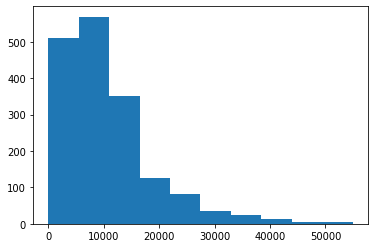

In [19]:
#ヒストグラム出力
plt.hist(train['y'].dropna(), bins=10)
plt.show()

In [20]:
train['year'].value_counts()

2012    682
2013    675
2014    364
Name: year, dtype: int64

# データの結合(train, test)

In [21]:
# trainとconditionを対戦カードidを基準に結合
tmp1 = pd.merge(train, condition, on='id', how='left')

# testとconditionを対戦カードidを基準に結合
tmp2 = pd.merge(test, condition, on='id', how='left')

# 結合したデータをstadiumを基準に結合
# 基準とする変数のチェック
train['stadium'].nunique()

58

In [22]:
stadium['name'].nunique()

59

In [23]:
# trainに無くてstadiumにある項目の確認
set(stadium['name']) - set(train['stadium'])

{'長崎市総合運動公園かきどまり陸上競技場'}

In [24]:
# 結合
train_new = pd.merge(tmp1, stadium, left_on='stadium', right_on='name', how='left')
test_new = pd.merge(tmp2, stadium, left_on='stadium', right_on='name', how='left')

# 欠損値の個数をカウント
train_new.isna().sum().sum()

0

In [25]:
test_new.isna().sum().sum()

0

# データの保存

In [26]:
# ファイル出力
train_new.to_csv('train_new.csv', index=False)
test_new.to_csv('test_new.csv', index=False)